# Crime reported in Italy from 2011 to 2021

#### Data source:  https://www.istat.it/en/

Author: Maria Fisher 


In [1]:
import warnings 
warnings.filterwarnings("ignore")

import os
import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns 
import sklearn
from pivottablejs import pivot_ui



In [2]:
# read dataset
df = pd.read_csv('crimeItaly2011-2021.csv')

df.head()

,ITTER107,Territory,TIPO_DATO35,Data_type,REATI_PS,Type_of_crime,SEXISTAT1,Gender,ETA1,Age class,TIME,Select_time,Value
0,IT,Italy,OFFEND,number of alleged offenders reported by the po...,MASSMURD,mass murder,1,males,Y18-24,18-24 years,2011,2011,9
1,IT,Italy,OFFEND,number of alleged offenders reported by the po...,MASSMURD,mass murder,1,males,Y18-24,18-24 years,2012,2012,1
2,IT,Italy,OFFEND,number of alleged offenders reported by the po...,MASSMURD,mass murder,1,males,Y18-24,18-24 years,2013,2013,2
3,IT,Italy,OFFEND,number of alleged offenders reported by the po...,MASSMURD,mass murder,1,males,Y18-24,18-24 years,2014,2014,1
4,IT,Italy,OFFEND,number of alleged offenders reported by the po...,MASSMURD,mass murder,1,males,Y18-24,18-24 years,2015,2015,3


In [3]:
# drop columns

df = df.drop(columns=['ITTER107','Data_type','REATI_PS', 'SEXISTAT1', 'Age class','Select_time'])
df

,Territory,TIPO_DATO35,Type_of_crime,Gender,ETA1,TIME,Value
0,Italy,OFFEND,mass murder,males,Y18-24,2011,9
1,Italy,OFFEND,mass murder,males,Y18-24,2012,1
2,Italy,OFFEND,mass murder,males,Y18-24,2013,2
3,Italy,OFFEND,mass murder,males,Y18-24,2014,1
4,Italy,OFFEND,mass murder,males,Y18-24,2015,3
...,...,...,...,...,...,...,...
500467,Sardegna,VICTIM,damage followed by arson,females,Y_UN13,2017,1
500468,Sardegna,VICTIM,damage followed by arson,females,Y_UN13,2018,0
500469,Sardegna,VICTIM,damage followed by arson,females,Y_UN13,2019,0
500470,Sardegna,VICTIM,damage followed by arson,females,Y_UN13,2020,0


In [4]:
# rename columns 

df = df.rename(columns={'TIPO_DATO35': 'Type_of_data', 'ETA1': 'Age', 'TIME':'Year', 'Value':'N_crime_reported'})
df 

,Territory,Type_of_data,Type_of_crime,Gender,Age,Year,N_crime_reported
0,Italy,OFFEND,mass murder,males,Y18-24,2011,9
1,Italy,OFFEND,mass murder,males,Y18-24,2012,1
2,Italy,OFFEND,mass murder,males,Y18-24,2013,2
3,Italy,OFFEND,mass murder,males,Y18-24,2014,1
4,Italy,OFFEND,mass murder,males,Y18-24,2015,3
...,...,...,...,...,...,...,...
500467,Sardegna,VICTIM,damage followed by arson,females,Y_UN13,2017,1
500468,Sardegna,VICTIM,damage followed by arson,females,Y_UN13,2018,0
500469,Sardegna,VICTIM,damage followed by arson,females,Y_UN13,2019,0
500470,Sardegna,VICTIM,damage followed by arson,females,Y_UN13,2020,0


In [5]:
# check list of crime type in dataset
df.Type_of_crime.unique()

array(['mass murder', 'intentional homicides',
       'homicides for theft or robbery', 'homicides of mafia',
       'terrorist homicides', 'attempted homicides', 'infanticides',
       'manslaughter', 'unintentional homicides',
       'homicides from road accident', 'blows', 'culpable injuries',
       'menaces', 'stalking', 'kidnappings', 'offences', 'rapes',
       'sexual activity with a minor', 'corruption of a minor',
       'exploitation and abetting prostitution', 'child pornography ',
       'thefts', 'bag-snatching', 'pickpocketing', 'burglary',
       'shoplifting', 'theft from vehicle', 'theft of art objets',
       'theft of cargo trucks carrying freights', 'moped theft',
       'motorcycle theft', 'car theft', 'robberies', 'house robbery',
       'bank robbery', 'post office robbery', 'shop robbery',
       'street robbery', 'extortions', 'swindles and cyber frauds',
       'cybercrime', 'counteractions of goods and industrial products',
       'intellectual property viol

In [6]:
# drop variable (row) total (total crime reported by the police to the justice system) to avoid confusion 

df.drop(df.index[(df["Type_of_crime"] == "total")],axis=0,inplace=True)



In [7]:
df.Type_of_crime.unique()

array(['mass murder', 'intentional homicides',
       'homicides for theft or robbery', 'homicides of mafia',
       'terrorist homicides', 'attempted homicides', 'infanticides',
       'manslaughter', 'unintentional homicides',
       'homicides from road accident', 'blows', 'culpable injuries',
       'menaces', 'stalking', 'kidnappings', 'offences', 'rapes',
       'sexual activity with a minor', 'corruption of a minor',
       'exploitation and abetting prostitution', 'child pornography ',
       'thefts', 'bag-snatching', 'pickpocketing', 'burglary',
       'shoplifting', 'theft from vehicle', 'theft of art objets',
       'theft of cargo trucks carrying freights', 'moped theft',
       'motorcycle theft', 'car theft', 'robberies', 'house robbery',
       'bank robbery', 'post office robbery', 'shop robbery',
       'street robbery', 'extortions', 'swindles and cyber frauds',
       'cybercrime', 'counteractions of goods and industrial products',
       'intellectual property viol

In [8]:
# check dataset structure 

print('Rows:\t{}'.format(df.shape[0]))
print('Variables:\t{}'.format(df.shape[1]))
df.dtypes


Rows:	494928
Variables:	7


Territory           object
Type_of_data        object
Type_of_crime       object
Gender              object
Age                 object
Year                 int64
N_crime_reported     int64
dtype: object

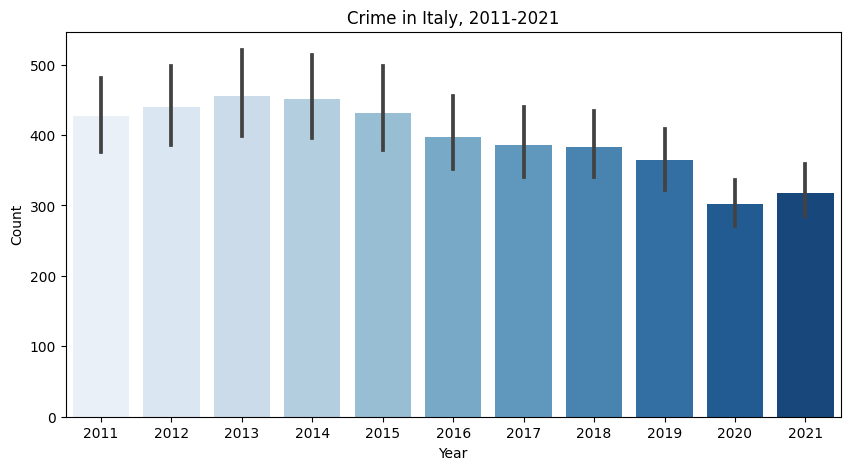

In [9]:
# plot graph of dataset 

plt.figure(figsize= (10,5))
sns.barplot(x= 'Year',y = 'N_crime_reported',data = df,palette='Blues')
plt.title('Crime in Italy, 2011-2021')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [10]:
# list all cities 

df.Territory.unique()

array(['Italy', 'Nord-ovest', 'Piemonte',
       "Valle d'Aosta / Vallée d'Aoste", 'Liguria', 'Lombardia',
       'Nord-est', 'Trentino Alto Adige / Südtirol',
       'Provincia Autonoma Bolzano / Bozen', 'Provincia Autonoma Trento',
       'Veneto', 'Friuli-Venezia Giulia', 'Emilia-Romagna', 'Centro (I)',
       'Toscana', 'Umbria', 'Marche', 'Lazio', 'Sud', 'Abruzzo', 'Molise',
       'Campania', 'Puglia', 'Basilicata', 'Calabria', 'Isole', 'Sicilia',
       'Sardegna'], dtype=object)

In [11]:
# sum all crimes reported by region 

sum_crime_region = df.groupby(by = df.Territory)['N_crime_reported','Territory'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(10)
sum_crime_region

,Territory,N_crime_reported
8,Italy,65066876
15,Nord-ovest,19332398
4,Centro (I),14057250
22,Sud,13177260
14,Nord-est,12220220
11,Lombardia,11720952
9,Lazio,7356352
7,Isole,6279748
5,Emilia-Romagna,5811170
3,Campania,5762096


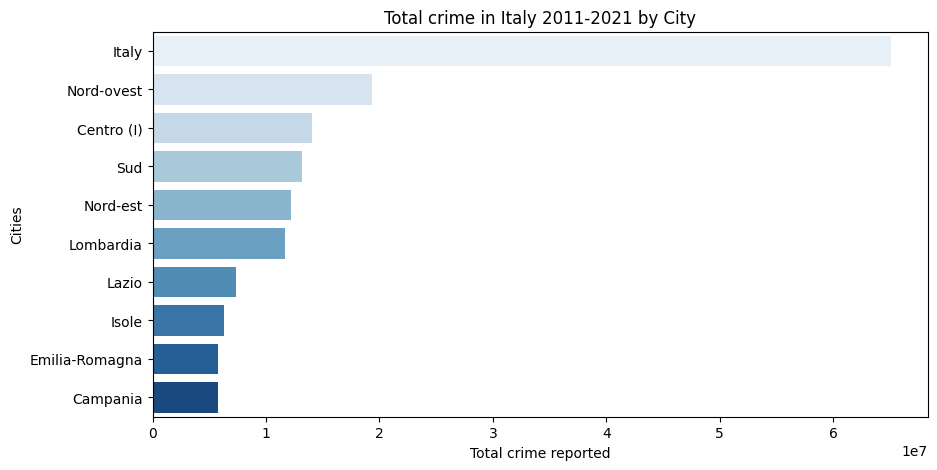

In [12]:
# plot graph of crimes by region

plt.figure(figsize= (10,5))
sns.barplot(x=sum_crime_region['N_crime_reported'],y= sum_crime_region['Territory'], orient='h', palette='Blues');
plt.title('Total crime in Italy 2011-2021 by City')
plt.xlabel('Total crime reported')
plt.ylabel('Cities')
plt.show()

## Crime by gender 

In [13]:
# sum crimes reported by gender 
sum_crime_gender = df.groupby(by = df.Gender)['N_crime_reported','Gender'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(10)
sum_crime_gender

,Gender,N_crime_reported
1,males,128063434
0,females,67972466


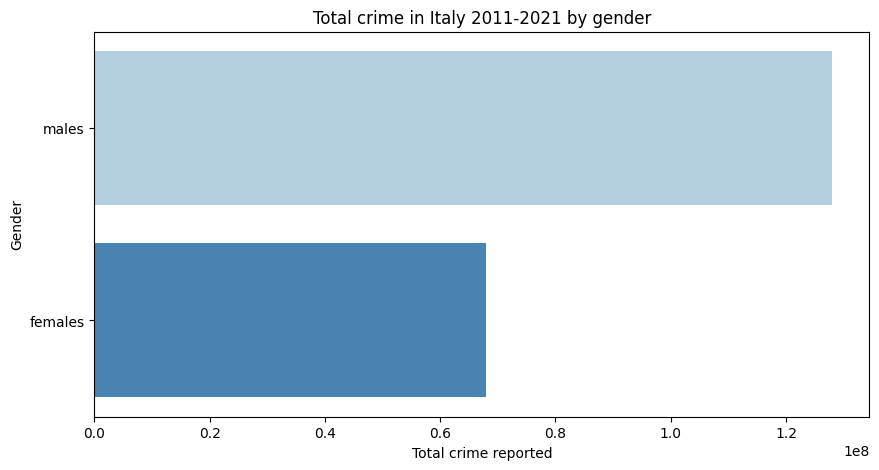

In [14]:
# graph of crimes reported by gender (Victims and offenders)
plt.figure(figsize= (10,5))
sns.barplot(x=sum_crime_gender['N_crime_reported'],y= sum_crime_gender['Gender'], orient='h', palette='Blues');
plt.title('Total crime in Italy 2011-2021 by gender')
plt.xlabel('Total crime reported')
plt.ylabel('Gender')
plt.show()

## Crime by age

In [15]:
# sum crimes reported by age range 

sum_crime_age = df.groupby(by = df.Age)['N_crime_reported','Age'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(10)
sum_crime_age

,Age,N_crime_reported
0,TOTAL,98017950
4,Y35-44,20972076
5,Y45-54,19744364
3,Y25-34,18322152
6,Y55-64,12882429
7,Y_GE65,12789785
2,Y18-24,10538244
1,Y14-17,2375535
8,Y_UN13,393365


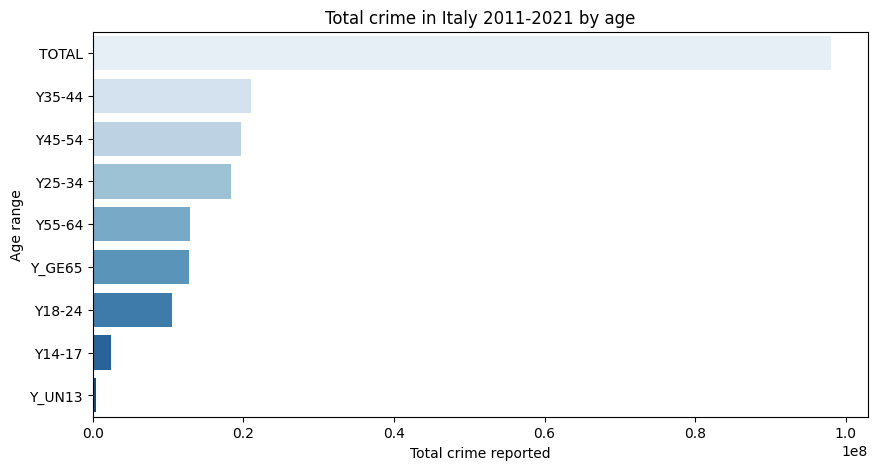

In [16]:
# graph of crime reported by age range 

plt.figure(figsize= (10,5))
sns.barplot(x=sum_crime_age['N_crime_reported'],y= sum_crime_age['Age'], orient='h', palette='Blues');
plt.title('Total crime in Italy 2011-2021 by age')
plt.xlabel('Total crime reported')
plt.ylabel('Age range')
plt.show()

## Crime Victim/Offender

In [17]:
# sum of total crime reported (Victims and offenders)

sum_crime_type = df.groupby(by = df.Type_of_data)['N_crime_reported','Type_of_data'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(10)
sum_crime_type

,Type_of_data,N_crime_reported
1,VICTIM,131044210
0,OFFEND,64991690


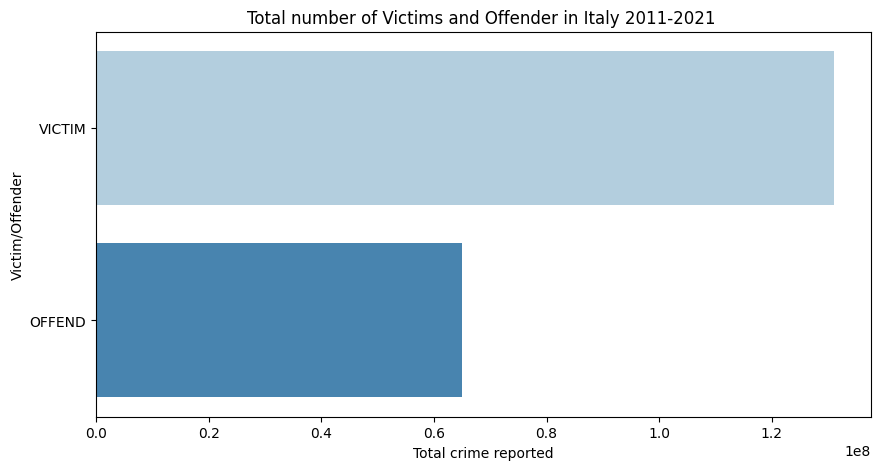

In [18]:
# graph total crime reported (Victims and offenders)

plt.figure(figsize= (10,5))
sns.barplot(x=sum_crime_type['N_crime_reported'],y= sum_crime_type['Type_of_data'], orient='h', palette='Blues');
plt.title('Total number of Victims and Offender in Italy 2011-2021 ')
plt.xlabel('Total crime reported')
plt.ylabel('Victim/Offender')
plt.show()

## Crime by type 

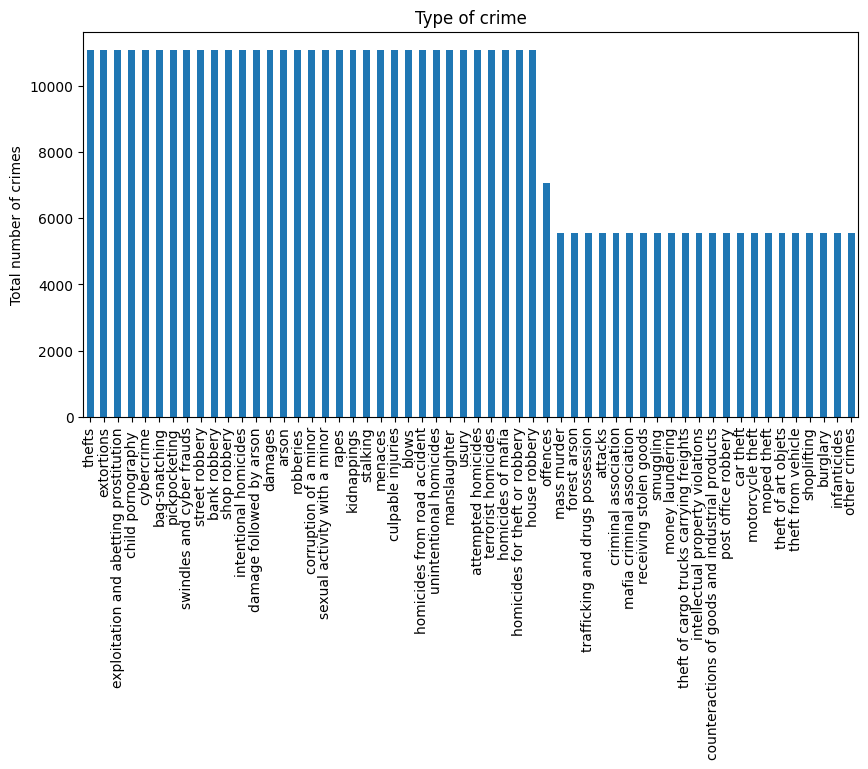

In [19]:
# graph of all crimes 

plt.figure(figsize=(10,5))
df['Type_of_crime'].value_counts().plot.bar()
plt.title('Type of crime')
plt.ylabel('Total number of crimes')
plt.show()

In [20]:
# sum all crimes by type across years 
sum_crime_type = df.groupby(by = df.Type_of_crime)['N_crime_reported','Type_of_crime'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(25)
sum_crime_type


,Type_of_crime,N_crime_reported
52,thefts,82745500
35,other crimes,24704196
15,damages,18157138
47,swindles and cyber frauds,14312692
36,pickpocketing,9652166
30,menaces,8799158
12,culpable injuries,7457854
53,trafficking and drugs possession,4424848
34,offences,3608920
40,robberies,3180742


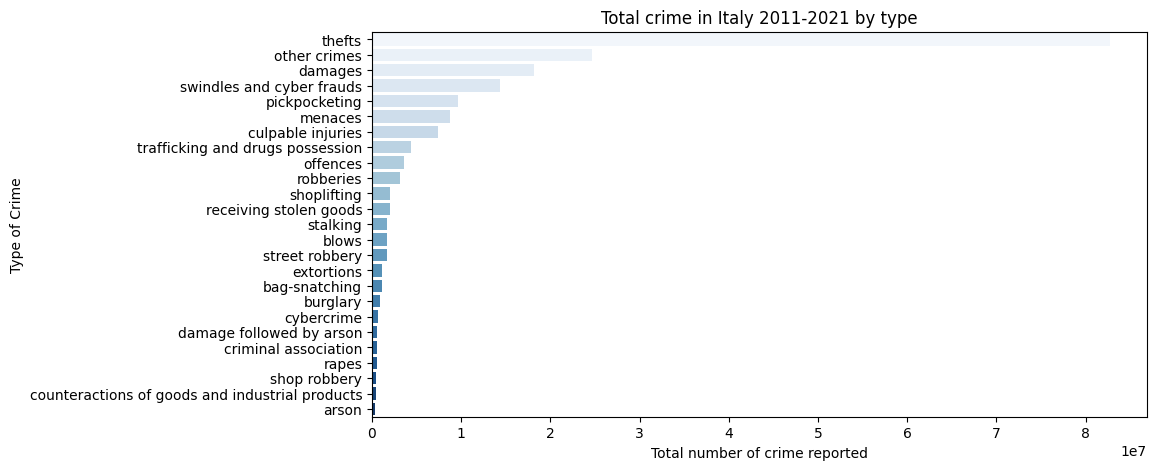

In [21]:
#  graph crimes by type across years 

plt.figure(figsize= (10,5))
sns.barplot(x=sum_crime_type['N_crime_reported'],y= sum_crime_type['Type_of_crime'], orient='h', palette='Blues');
plt.title('Total crime in Italy 2011-2021 by type')
plt.xlabel('Total number of crime reported')
plt.ylabel('Type of Crime')
plt.show()

## Crime type : Sex abuse

In [22]:
# group data on sex crimes

crime_sex_abuse = df.apply(lambda row: row[df['Type_of_crime'].isin(['rapes','exploitation and abetting prostitution', 
                                                                                         'child pornography ','stalking',  'sexual activity with a minor', 
                                                                                         'corruption of a minor',])])
crime_sex_abuse.head()

,Territory,Type_of_data,Type_of_crime,Gender,Age,Year,N_crime_reported
528,Italy,OFFEND,stalking,males,Y18-24,2011,523
529,Italy,OFFEND,stalking,males,Y18-24,2012,518
530,Italy,OFFEND,stalking,males,Y18-24,2013,751
531,Italy,OFFEND,stalking,males,Y18-24,2014,709
532,Italy,OFFEND,stalking,males,Y18-24,2015,680


In [23]:
# sum sex crimes 
sum_crime_sex = crime_sex_abuse.groupby(by = crime_sex_abuse.Territory)['N_crime_reported','Territory'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(25)
sum_crime_sex

,Territory,N_crime_reported
8,Italy,869984
15,Nord-ovest,213742
22,Sud,213308
4,Centro (I),172334
14,Nord-est,155954
11,Lombardia,129148
7,Isole,114646
21,Sicilia,91086
3,Campania,87054
9,Lazio,85112


In [24]:
# remove the the row Italy with values for the whole contry to perform stats
sex_abuse = sum_crime_sex.loc[sum_crime_sex["Territory"] != 'Italy']
sex_abuse

,Territory,N_crime_reported
15,Nord-ovest,213742
22,Sud,213308
4,Centro (I),172334
14,Nord-est,155954
11,Lombardia,129148
7,Isole,114646
21,Sicilia,91086
3,Campania,87054
9,Lazio,85112
5,Emilia-Romagna,69442


In [25]:
# stats
sex_abuse.describe()

,N_crime_reported
count,24.00
mean,72578.17
std,63780.51
min,7554.00
25%,19230.50
50%,57030.00
75%,96976.00
max,213742.00


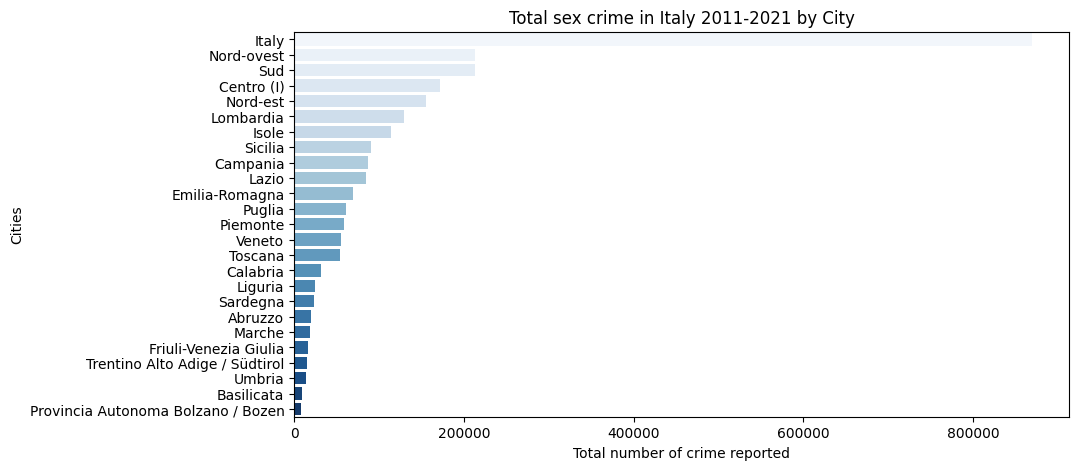

In [26]:
# graph of sex crimes by region 

plt.figure(figsize= (10,5))
sns.barplot(x=sum_crime_sex['N_crime_reported'],y= sum_crime_sex['Territory'], orient='h', palette='Blues');
plt.title('Total sex crime in Italy 2011-2021 by City')
plt.xlabel('Total number of crime reported')
plt.ylabel('Cities')
plt.show()

In [27]:
# sex crimes by type
sex_crime = crime_sex_abuse.groupby(by = crime_sex_abuse.Type_of_crime)['N_crime_reported','Type_of_crime'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(25)
sex_crime

,Type_of_crime,N_crime_reported
5,stalking,1678660
3,rapes,573930
2,exploitation and abetting prostitution,202484
0,child pornography,81160
4,sexual activity with a minor,69166
1,corruption of a minor,19286


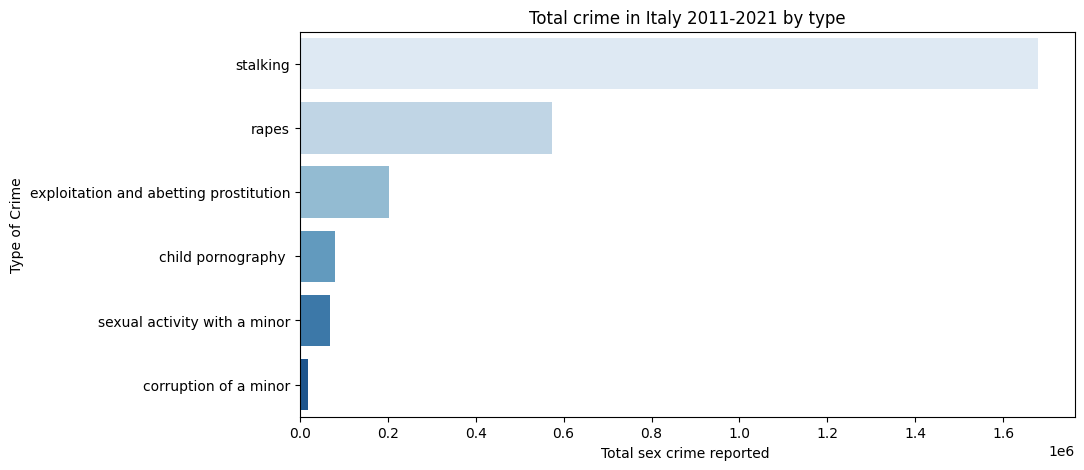

In [28]:
#graph of sex crimes by type

plt.figure(figsize= (10,5))
sns.barplot(x=sex_crime['N_crime_reported'],y= sex_crime['Type_of_crime'], orient='h', palette='Blues');
plt.title('Total crime in Italy 2011-2021 by type')
plt.xlabel('Total sex crime reported ')
plt.ylabel('Type of Crime')
plt.show()

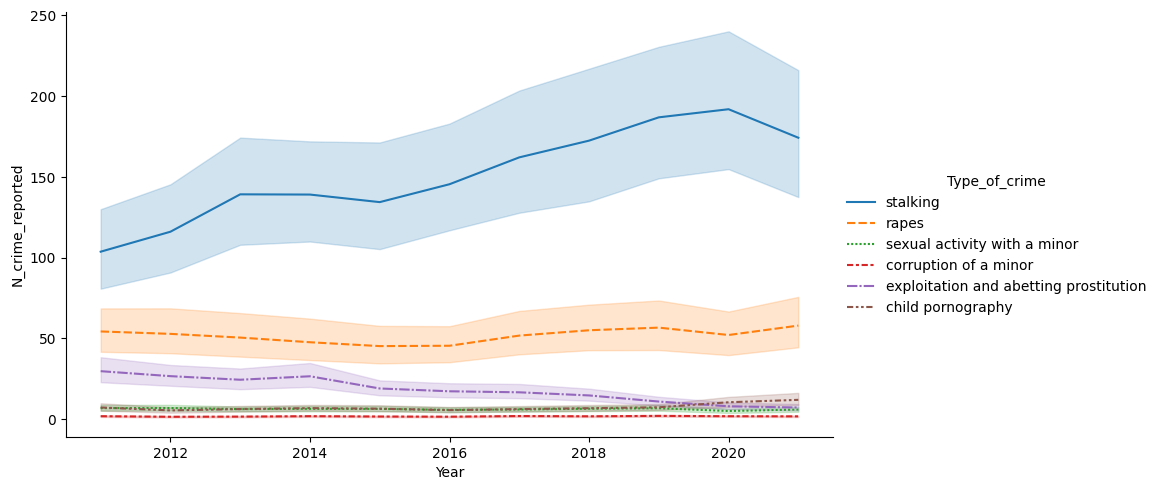

In [29]:
#Sexual crime by year
crime_sex = sns.relplot(kind='line', data=crime_sex_abuse, x='Year', y='N_crime_reported', hue='Type_of_crime', style='Type_of_crime', aspect=1.75)


### Crime type : Murder

In [30]:
#  group data on muder

crime_murder = df.apply(lambda row: row[df['Type_of_crime'].isin(['mass murder', 'intentional homicides',
       'homicides for theft or robbery', 'homicides of mafia', 'terrorist homicides', 'attempted homicides',
        'infanticides', 'manslaughter', 'unintentional homicides', 'homicides from road accident'])])
crime_murder.head()

,Territory,Type_of_data,Type_of_crime,Gender,Age,Year,N_crime_reported
0,Italy,OFFEND,mass murder,males,Y18-24,2011,9
1,Italy,OFFEND,mass murder,males,Y18-24,2012,1
2,Italy,OFFEND,mass murder,males,Y18-24,2013,2
3,Italy,OFFEND,mass murder,males,Y18-24,2014,1
4,Italy,OFFEND,mass murder,males,Y18-24,2015,3


In [31]:
# sum murder
sum_crime_murder = crime_murder.groupby(by = crime_murder.Territory)['N_crime_reported','Territory'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(25)
sum_crime_murder

,Territory,N_crime_reported
8,Italy,238310
22,Sud,70802
15,Nord-ovest,52674
4,Centro (I),45252
14,Nord-est,41238
11,Lombardia,32258
3,Campania,30138
7,Isole,28344
9,Lazio,24602
21,Sicilia,22230


In [32]:
# remove the the row Italy with values for the whole contry to perform stats
stats_murder = sum_crime_murder.loc[sum_crime_murder["Territory"] != 'Italy']
stats_murder

,Territory,N_crime_reported
22,Sud,70802
15,Nord-ovest,52674
4,Centro (I),45252
14,Nord-est,41238
11,Lombardia,32258
3,Campania,30138
7,Isole,28344
9,Lazio,24602
21,Sicilia,22230
5,Emilia-Romagna,18940


In [33]:
# stats

stats_murder.describe()

,N_crime_reported
count,24.00
mean,19869.92
std,18078.95
min,1798.00
25%,5386.50
50%,14737.00
75%,28792.50
max,70802.00


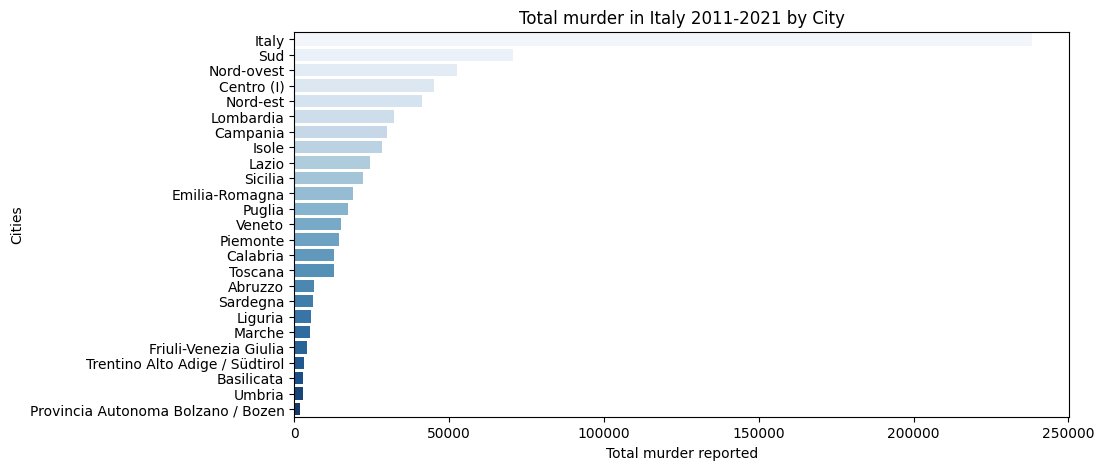

In [34]:
# plog graph of total muder reposted by region

plt.figure(figsize= (10,5))
sns.barplot(x=sum_crime_murder['N_crime_reported'],y= sum_crime_murder['Territory'], orient='h', palette='Blues');
plt.title('Total murder in Italy 2011-2021 by City')
plt.xlabel('Total murder reported')
plt.ylabel('Cities')
plt.show()

In [35]:
# muder by type
murder = crime_murder.groupby(by = crime_murder.Type_of_crime)['N_crime_reported','Type_of_crime'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(25)
murder

,Type_of_crime,N_crime_reported
9,unintentional homicides,236878
0,attempted homicides,208770
2,homicides from road accident,148214
5,intentional homicides,91936
3,homicides of mafia,19776
1,homicides for theft or robbery,5508
6,manslaughter,5426
7,mass murder,1386
4,infanticides,196
8,terrorist homicides,0


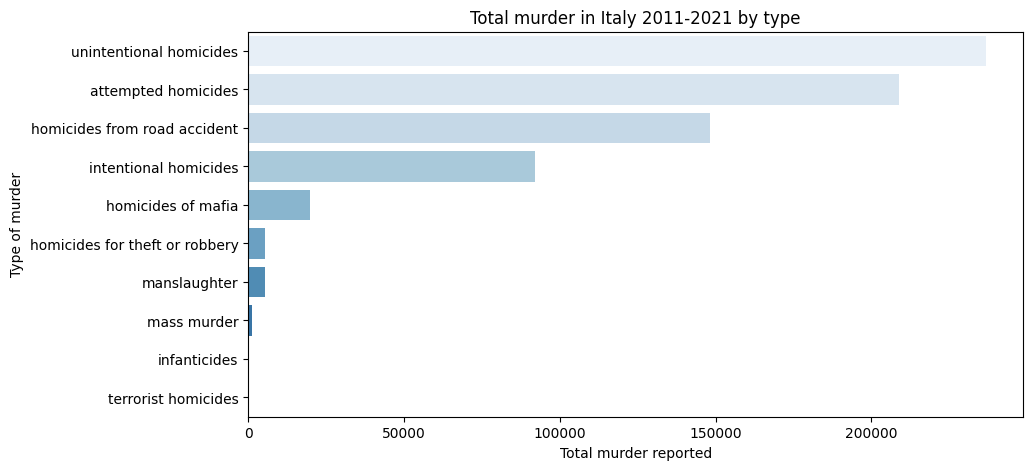

In [36]:
# graph of muder by type

plt.figure(figsize= (10,5))
sns.barplot(x=murder['N_crime_reported'],y= murder['Type_of_crime'], orient='h', palette='Blues');
plt.title('Total murder in Italy 2011-2021 by type')
plt.xlabel('Total murder reported')
plt.ylabel('Type of murder')
plt.show()

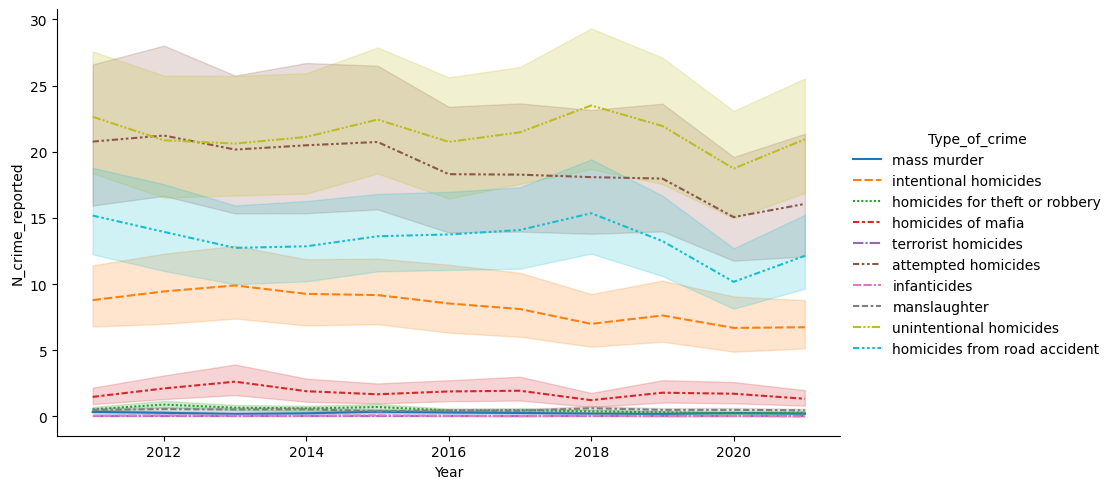

In [37]:
# Murder by year
murder = sns.relplot(kind='line', data=crime_murder, x='Year', y='N_crime_reported', hue='Type_of_crime', style='Type_of_crime', aspect=1.75)


## Crime type : Robbery

In [38]:
# group data by robbery 

crime_robbery = df.apply(lambda row: row[df['Type_of_crime'].isin(['thefts', 'bag-snatching', 'pickpocketing', 
       'burglary','shoplifting', 'theft from vehicle', 'theft of art objets', 'car theft', 'robberies',
       'theft of cargo trucks carrying freights', 'moped theft','motorcycle theft', 'house robbery',
       'bank robbery', 'post office robbery', 'shop robbery', 'street robbery', ])])
crime_robbery.head()

,Territory,Type_of_data,Type_of_crime,Gender,Age,Year,N_crime_reported
864,Italy,OFFEND,thefts,males,Y18-24,2011,19886
865,Italy,OFFEND,thefts,males,Y18-24,2012,21803
866,Italy,OFFEND,thefts,males,Y18-24,2013,23183
867,Italy,OFFEND,thefts,males,Y18-24,2014,21702
868,Italy,OFFEND,thefts,males,Y18-24,2015,20219


In [39]:
# sum robbery reported by region

sum_crime_robbery = crime_robbery.groupby(by = crime_robbery.Territory)['N_crime_reported','Territory'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(25)
sum_crime_robbery

,Territory,N_crime_reported
8,Italy,34133428
15,Nord-ovest,10697260
4,Centro (I),7904826
14,Nord-est,6829652
11,Lombardia,6765184
22,Sud,5926272
9,Lazio,4409562
5,Emilia-Romagna,3417952
16,Piemonte,2838132
3,Campania,2816890


In [40]:
# remove the the row Italy with values for the whole contry to perform stats
stats_robbery = sum_crime_robbery.loc[sum_crime_robery["Territory"] != 'Italy']
stats_robbery

,Territory,N_crime_reported
15,Nord-ovest,10697260
4,Centro (I),7904826
14,Nord-est,6829652
11,Lombardia,6765184
22,Sud,5926272
9,Lazio,4409562
5,Emilia-Romagna,3417952
16,Piemonte,2838132
3,Campania,2816890
7,Isole,2775418


In [41]:
# stats

stats_robbery.describe()

,N_crime_reported
count,24.00
mean,2853159.50
std,2860342.08
min,198856.00
25%,507683.00
50%,2402625.00
75%,3665854.50
max,10697260.00


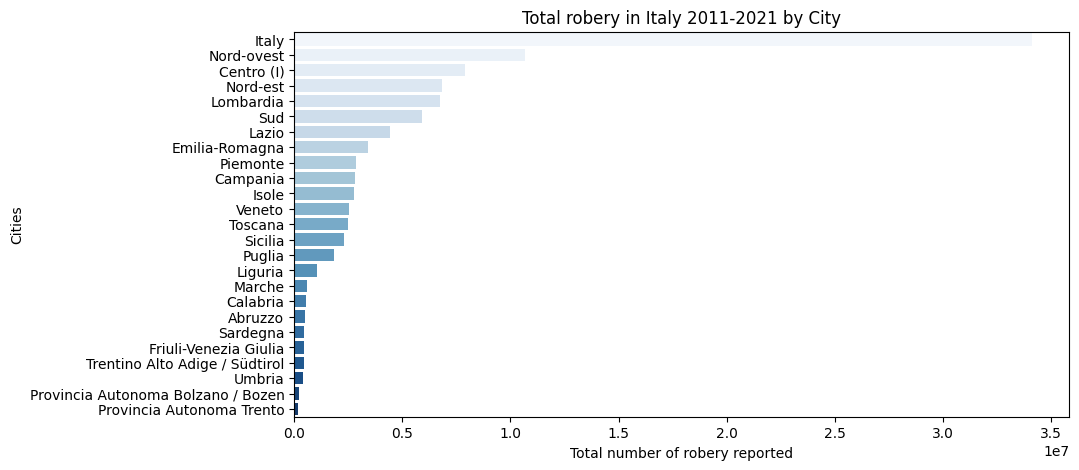

In [42]:
# plot graph of total number of robbery by region 

plt.figure(figsize= (10,5))
sns.barplot(x=sum_crime_robbery['N_crime_reported'],y= sum_crime_robbery['Territory'], orient='h', palette='Blues');
plt.title('Total robbery in Italy 2011-2021 by City')
plt.xlabel('Total number of robbery reported')
plt.ylabel('Cities')
plt.show()

In [43]:
# sum robbery by type

robbery = crime_robbery.groupby(by = crime_robbery.Type_of_crime)['N_crime_reported','Type_of_crime'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(25)
robbery

,Type_of_crime,N_crime_reported
16,thefts,82745500
7,pickpocketing,9652166
9,robberies,3180742
11,shoplifting,2084678
12,street robbery,1650300
0,bag-snatching,1134604
2,burglary,903254
10,shop robbery,495424
4,house robbery,309150
13,theft from vehicle,272026


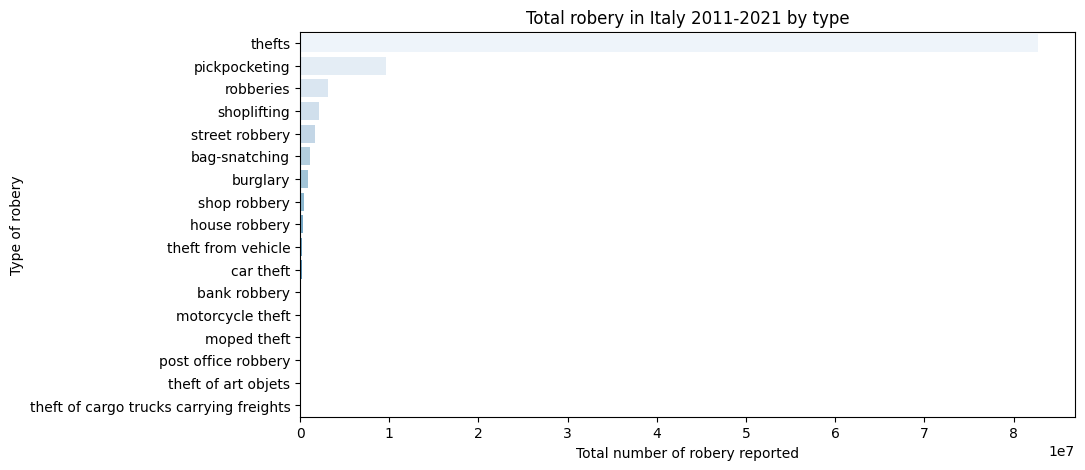

In [44]:
# plot graph of robbery by type

plt.figure(figsize= (10,5))
sns.barplot(x=robbery['N_crime_reported'],y= robbery['Type_of_crime'], orient='h', palette='Blues');
plt.title('Total robery in Italy 2011-2021 by type')
plt.xlabel('Total number of robbery reported')
plt.ylabel('Type of robbery')
plt.show()

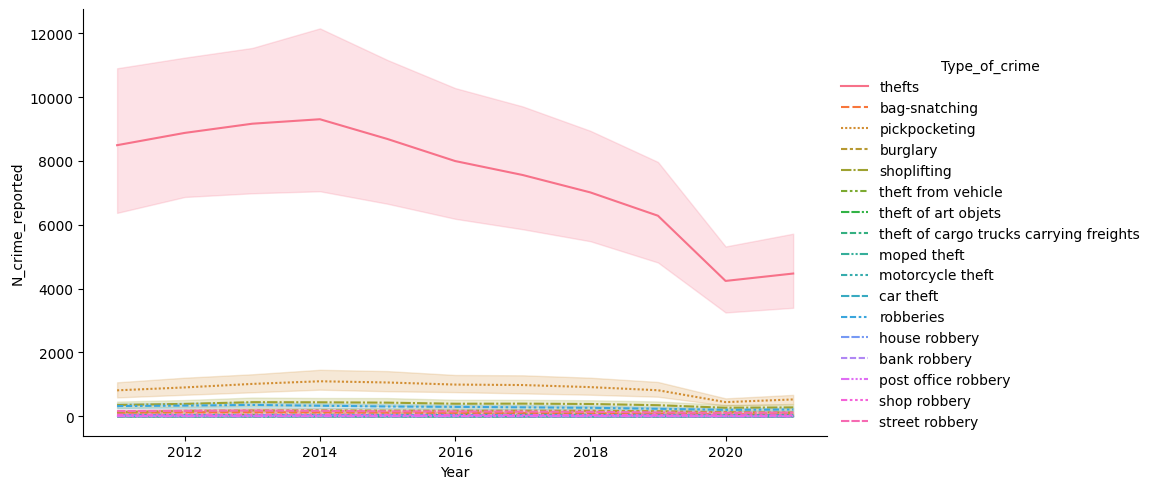

In [45]:
robery = sns.relplot(kind='line', data=crime_robbery, x='Year', y='N_crime_reported', hue='Type_of_crime', style='Type_of_crime', aspect=1.75)


## Crime type : Fraud

In [46]:
crime_fraud = df.apply(lambda row: row[df['Type_of_crime'].isin(['extortions', 'swindles and cyber frauds',
       'cybercrime', 'counteractions of goods and industrial products','intellectual property violations',
       'receiving stolen goods','money laundering', 'usury'])])
crime_fraud.head()

,Territory,Type_of_data,Type_of_crime,Gender,Age,Year,N_crime_reported
1414,Italy,OFFEND,extortions,males,Y18-24,2011,1326
1415,Italy,OFFEND,extortions,males,Y18-24,2012,1223
1416,Italy,OFFEND,extortions,males,Y18-24,2013,1324
1417,Italy,OFFEND,extortions,males,Y18-24,2014,1264
1418,Italy,OFFEND,extortions,males,Y18-24,2015,1296


In [47]:
sum_crime_fraud = crime_fraud.groupby(by = crime_fraud.Territory)['N_crime_reported','Territory'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(25)
sum_crime_fraud

,Territory,N_crime_reported
8,Italy,6322724
15,Nord-ovest,1691260
22,Sud,1577024
4,Centro (I),1237156
14,Nord-est,1142364
11,Lombardia,977368
3,Campania,727928
7,Isole,674920
9,Lazio,602916
21,Sicilia,517336


In [48]:
# remove the the row Italy with values for the whole contry to perform stats
stats_fraud = sum_crime_fraud.loc[sum_crime_fraud["Territory"] != 'Italy']
stats_fraud

,Territory,N_crime_reported
15,Nord-ovest,1691260
22,Sud,1577024
4,Centro (I),1237156
14,Nord-est,1142364
11,Lombardia,977368
3,Campania,727928
7,Isole,674920
9,Lazio,602916
21,Sicilia,517336
16,Piemonte,488038


In [49]:
# stats

stats_fraud.describe()

,N_crime_reported
count,24.00
mean,526537.00
std,479246.91
min,40992.00
25%,142578.00
50%,428454.00
75%,688172.00
max,1691260.00


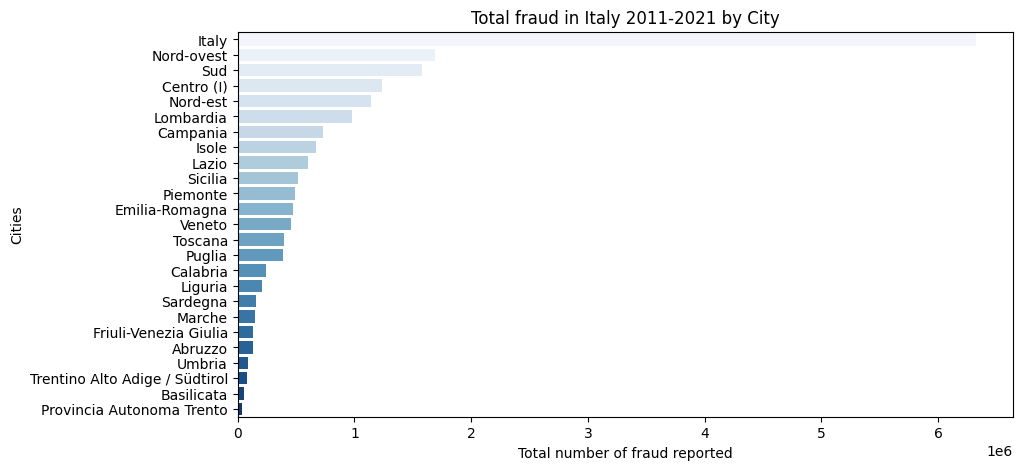

In [50]:
# plot graph total fraud reported by region

plt.figure(figsize= (10,5))
sns.barplot(x=sum_crime_fraud['N_crime_reported'],y= sum_crime_fraud['Territory'], orient='h', palette='Blues');
plt.title('Total fraud in Italy 2011-2021 by City')
plt.xlabel('Total number of fraud reported')
plt.ylabel('Cities')
plt.show()

In [51]:
# sum fraud by type

fraud = crime_fraud.groupby(by = crime_fraud.Type_of_crime)['N_crime_reported','Type_of_crime'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(25)
fraud

,Type_of_crime,N_crime_reported
6,swindles and cyber frauds,14312692
5,receiving stolen goods,1993784
2,extortions,1156184
1,cybercrime,687684
0,counteractions of goods and industrial products,478488
4,money laundering,271540
7,usury,80384
3,intellectual property violations,66628


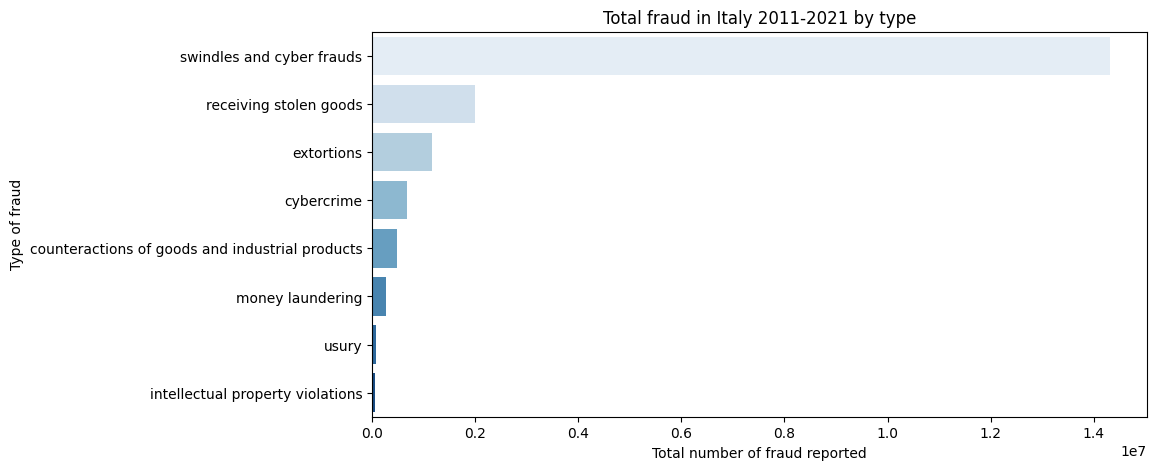

In [52]:
# plot graph fraud by type

plt.figure(figsize= (10,5))
sns.barplot(x=fraud['N_crime_reported'],y= fraud['Type_of_crime'], orient='h', palette='Blues');
plt.title('Total fraud in Italy 2011-2021 by type')
plt.xlabel('Total number of fraud reported')
plt.ylabel('Type of fraud')
plt.show()

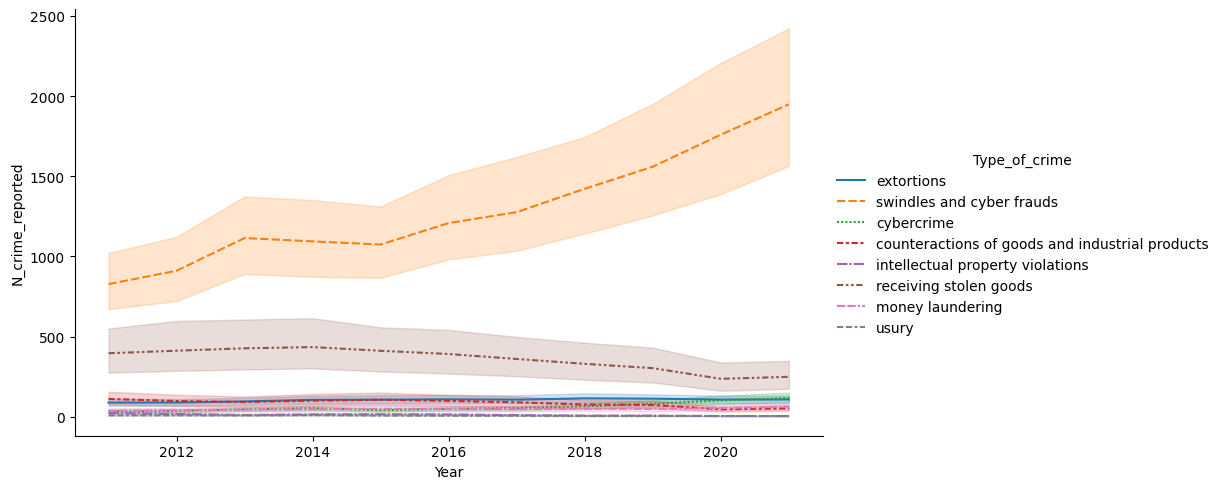

In [53]:
fraud = sns.relplot(kind='line', data=crime_fraud, x='Year', y='N_crime_reported', hue='Type_of_crime', style='Type_of_crime', aspect=1.75)


## Crime type : Others

In [54]:
# group data on any other crime reported 

crime_others = df.apply(lambda row: row[df['Type_of_crime'].isin(['damages', 'arson', 'forest arson',
       'damage followed by arson', 'trafficking and drugs possession','attacks', 'criminal association', 
       'mafia criminal association', 'smuggling', 'other crimes'])])
crime_others.head()

,Territory,Type_of_data,Type_of_crime,Gender,Age,Year,N_crime_reported
1678,Italy,OFFEND,damages,males,Y18-24,2011,5225
1679,Italy,OFFEND,damages,males,Y18-24,2012,4863
1680,Italy,OFFEND,damages,males,Y18-24,2013,5219
1681,Italy,OFFEND,damages,males,Y18-24,2014,4613
1682,Italy,OFFEND,damages,males,Y18-24,2015,4577


In [55]:
 # sum any other crime reported 

sum_crime_others = crime_others.groupby(by = crime_others.Territory)['N_crime_reported','Territory'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(25)
sum_crime_others

,Territory,N_crime_reported
8,Italy,16292456
15,Nord-ovest,4836080
22,Sud,3599598
4,Centro (I),3331154
14,Nord-est,2744070
11,Lombardia,2740886
7,Isole,1781554
9,Lazio,1623868
16,Piemonte,1488698
3,Campania,1387938


In [56]:
# remove the the row Italy with values for the whole contry to perform stats
stats_othercrimes = sum_crime_others.loc[sum_crime_others["Territory"] != 'Italy']
stats_othercrimes

,Territory,N_crime_reported
15,Nord-ovest,4836080
22,Sud,3599598
4,Centro (I),3331154
14,Nord-est,2744070
11,Lombardia,2740886
7,Isole,1781554
9,Lazio,1623868
16,Piemonte,1488698
3,Campania,1387938
21,Sicilia,1368860


In [57]:
# stats

stats_othercrimes.describe()

,N_crime_reported
count,24.00
mean,1357588.42
std,1256426.62
min,101888.00
25%,346291.50
50%,1068363.00
75%,1663289.50
max,4836080.00


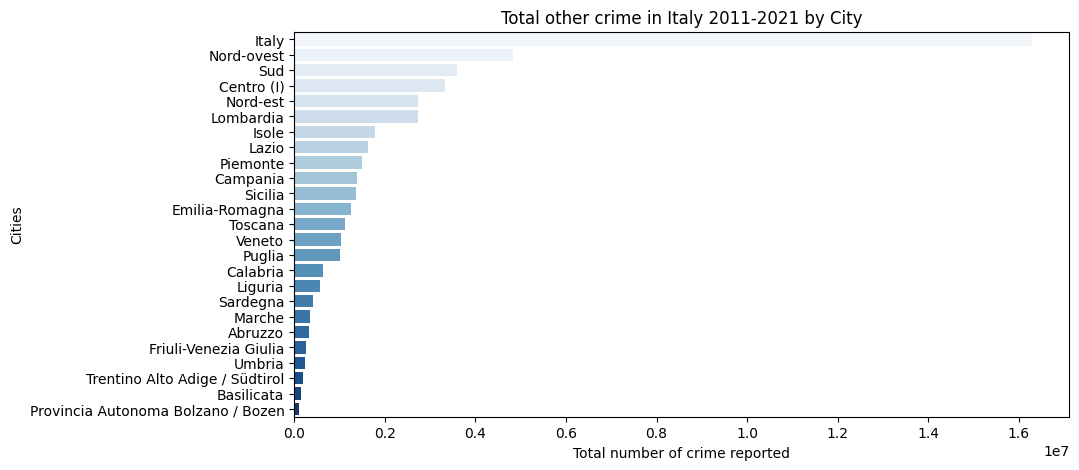

In [58]:
#  plot graph of other crime reported 

plt.figure(figsize= (10,5))
sns.barplot(x=sum_crime_others['N_crime_reported'],y= sum_crime_others['Territory'], orient='h', palette='Blues');
plt.title('Total other crime in Italy 2011-2021 by City')
plt.xlabel('Total number of crime reported')
plt.ylabel('Cities')
plt.show()

In [59]:
# sum other crimes by type 

others = crime_others.groupby(by = crime_others.Type_of_crime)['N_crime_reported','Type_of_crime'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(25)
others

,Type_of_crime,N_crime_reported
7,other crimes,24704196
4,damages,18157138
9,trafficking and drugs possession,4424848
3,damage followed by arson,581406
2,criminal association,578588
0,arson,367384
6,mafia criminal association,157592
8,smuggling,65894
5,forest arson,27268
1,attacks,13884


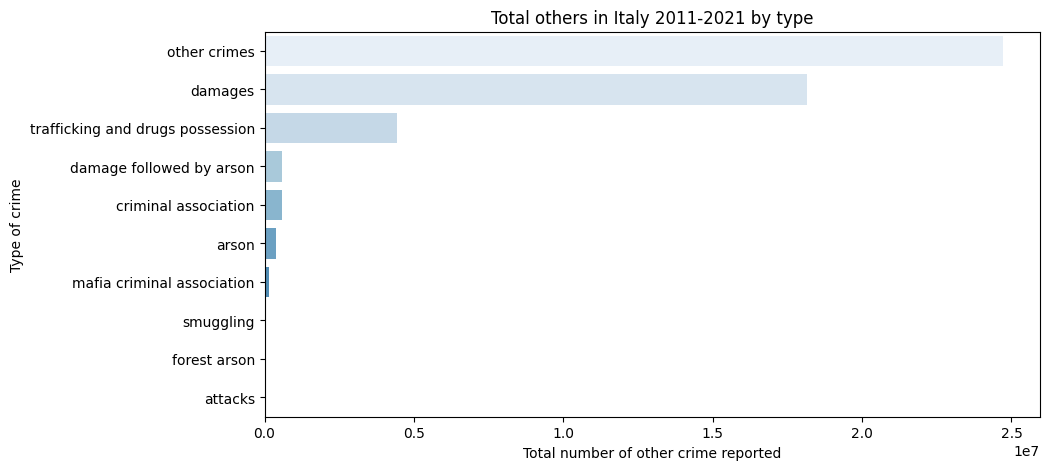

In [60]:
# plot graph of other crimes by type 

plt.figure(figsize= (10,5))
sns.barplot(x=others['N_crime_reported'],y= others['Type_of_crime'], orient='h', palette='Blues');
plt.title('Total others in Italy 2011-2021 by type')
plt.xlabel('Total number of other crime reported')
plt.ylabel('Type of crime')
plt.show()

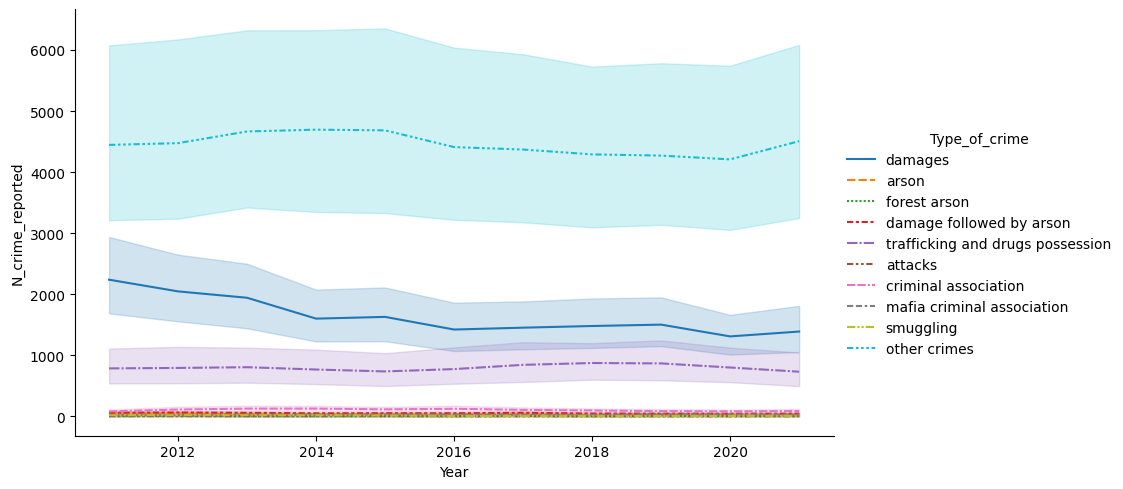

In [61]:
others = sns.relplot(kind='line', data=crime_others, x='Year', y='N_crime_reported', hue='Type_of_crime', style='Type_of_crime', aspect=1.75)


In [62]:
# transform the dataframe using pivot table  

p_table = pd.pivot_table(df, index = ['Territory','Gender', 'Type_of_data', 'Age', 'Year'],
                             columns= 'Type_of_crime',
                             values= 'N_crime_reported')
p_table

Type_of_crime                               arson  attacks  \
Territory Gender  Type_of_data Age    Year                   
Abruzzo   females OFFEND       TOTAL  2011   7.00     0.00   
                                      2012   3.00     0.00   
                                      2013   3.00     0.00   
                                      2014   3.00     0.00   
                                      2015   2.00     1.00   
...                                           ...      ...   
Veneto    males   VICTIM       Y_UN13 2017   0.00      NaN   
                                      2018   0.00      NaN   
                                      2019   0.00      NaN   
                                      2020   0.00      NaN   
                                      2021   0.00      NaN   

Type_of_crime                               attempted homicides  \
Territory Gender  Type_of_data Age    Year                        
Abruzzo   females OFFEND       TOTAL  2011                 0.00   
                                      2012                 5.00   
                                      2013                 3.00   
                                      2014                 4.00   
                                      2015                 3.00   
...                                                         ...   
Veneto    males   VICTIM       Y_UN13 2017                 0.00   
                                      2018                 0.00   
                                      2019                 2.00   
                                      2020                 0.00   
                                      2021                 1.00   

Type_of_crime                               bag-snatching  bank robbery  \
Territory Gender  Type_of_data Age    Year                                
Abruzzo   females OFFEND       TOTAL  2011           1.00          0.00   
                                      2012           4.00          1.00   
                                      2013           9.00          3.00   
                                      2014           1.00          3.00   
                                      2015           4.00          3.00   
...                                                   ...           ...   
Veneto    males   VICTIM       Y_UN13 2017           2.00          0.00   
                                      2018           2.00          0.00   
                                      2019           1.00          0.00   
                                      2020           1.00          0.00   
                                      2021           1.00          0.00   

Type_of_crime                               blows  burglary  car theft  \
Territory Gender  Type_of_data Age    Year                               
Abruzzo   females OFFEND       TOTAL  2011  64.00     59.00       6.00   
                                      2012  56.00     91.00       3.00   
                                      2013  49.00     98.00       2.00   
                                      2014  50.00    118.00       6.00   
                                      2015  44.00     80.00       6.00   
...                                           ...       ...        ...   
Veneto    males   VICTIM       Y_UN13 2017   8.00       NaN        NaN   
                                      2018  16.00       NaN        NaN   
                                      2019  30.00       NaN        NaN   
                                      2020  14.00       NaN        NaN   
                                      2021  28.00       NaN        NaN   

Type_of_crime                               child pornography   \
Territory Gender  Type_of_data Age    Year                       
Abruzzo   females OFFEND       TOTAL  2011                0.00   
                                      2012                1.00   
                                      2013                8.00   
                                      2014          

In [63]:
# fill na with 0

df2 = p_table.fillna(0)
df2

Type_of_crime                               arson  attacks  \
Territory Gender  Type_of_data Age    Year                   
Abruzzo   females OFFEND       TOTAL  2011   7.00     0.00   
                                      2012   3.00     0.00   
                                      2013   3.00     0.00   
                                      2014   3.00     0.00   
                                      2015   2.00     1.00   
...                                           ...      ...   
Veneto    males   VICTIM       Y_UN13 2017   0.00     0.00   
                                      2018   0.00     0.00   
                                      2019   0.00     0.00   
                                      2020   0.00     0.00   
                                      2021   0.00     0.00   

Type_of_crime                               attempted homicides  \
Territory Gender  Type_of_data Age    Year                        
Abruzzo   females OFFEND       TOTAL  2011                 0.00   
                                      2012                 5.00   
                                      2013                 3.00   
                                      2014                 4.00   
                                      2015                 3.00   
...                                                         ...   
Veneto    males   VICTIM       Y_UN13 2017                 0.00   
                                      2018                 0.00   
                                      2019                 2.00   
                                      2020                 0.00   
                                      2021                 1.00   

Type_of_crime                               bag-snatching  bank robbery  \
Territory Gender  Type_of_data Age    Year                                
Abruzzo   females OFFEND       TOTAL  2011           1.00          0.00   
                                      2012           4.00          1.00   
                                      2013           9.00          3.00   
                                      2014           1.00          3.00   
                                      2015           4.00          3.00   
...                                                   ...           ...   
Veneto    males   VICTIM       Y_UN13 2017           2.00          0.00   
                                      2018           2.00          0.00   
                                      2019           1.00          0.00   
                                      2020           1.00          0.00   
                                      2021           1.00          0.00   

Type_of_crime                               blows  burglary  car theft  \
Territory Gender  Type_of_data Age    Year                               
Abruzzo   females OFFEND       TOTAL  2011  64.00     59.00       6.00   
                                      2012  56.00     91.00       3.00   
                                      2013  49.00     98.00       2.00   
                                      2014  50.00    118.00       6.00   
                                      2015  44.00     80.00       6.00   
...                                           ...       ...        ...   
Veneto    males   VICTIM       Y_UN13 2017   8.00      0.00       0.00   
                                      2018  16.00      0.00       0.00   
                                      2019  30.00      0.00       0.00   
                                      2020  14.00      0.00       0.00   
                                      2021  28.00      0.00       0.00   

Type_of_crime                               child pornography   \
Territory Gender  Type_of_data Age    Year                       
Abruzzo   females OFFEND       TOTAL  2011                0.00   
                                      2012                1.00   
                                      2013                8.00   
                                      2014          

In [64]:
# save data for further use 

df2.to_csv('ITcrime_pivot_table.csv')

## Interactive panel
#pip install pivottablejs

With interactive panel, it is possible to evaluate all variables and perform stats (Average, Median, Sum, Variance, Deviation, Lower and Upper bound, etc). 


In [65]:
# call interactive panel 

pivot_ui(df2)

#### References


https://pivottable.js.org/examples/